# Analysis of Netflix Movies and TV Shows

### Content
1. Introduction: What is Netflix?
2. Data description and objectives
   + 2.1 Data description 
   + 2.2 Objectives    
3. Data acquisition, manipulation and validation
4. Data analysis and visualization 
5. Conclusion

## 1. Introduction: What is Netflix?

Netflix, Inc. is an American technology and media services provider and production company headquartered in Los Gatos, California. Netflix was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. The company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television series, including those produced in-house. As of April 2020, Netflix had over 193 million paid subscriptions worldwide, including 73 million in the United States.It is available worldwide except in the following: mainland China (due to local restrictions), Syria, North Korea, and Crimea (due to U.S. sanctions). The company also has offices in France, United States, United Kingdom, Brazil, the Netherlands, India, Japan, and South Korea. Netflix is a member of the Motion Picture Association (MPA). Today, the company produces and distributes content from countries all over the globe.

Netflix's initial business model included DVD sales and rental by mail, but Hastings abandoned the sales about a year after the company's founding to focus on the initial DVD rental business. Netflix expanded its business in 2007 with the introduction of streaming media while retaining the DVD and Blu-ray rental business. The company expanded internationally in 2010 with streaming available in Canada, followed by Latin America and the Caribbean. Netflix entered the content-production industry in 2013, debuting its first series House of Cards.

Since 2012, Netflix has taken more of an active role as producer and distributor for both film and television series, and to that end, it offers a variety of "Netflix Original" content through its online library. By January 2016, Netflix services operated in more than 190 countries. Netflix released an estimated 126 original series and films in 2016, more than any other network or cable channel. On July 10, 2020, Netflix became the largest entertainment/media company by market cap.

Source (https://en.wikipedia.org/wiki/Netflix)

## 2. Data description and objectives

### 2.1 Data description

It is clear from the description that Netflix has a large dataset of its movies and TV shows. Since Netflix is the largest entertainment/media company by market cap, there is an obvious increasing trend in watching TV shows and movies on Netflix worldwide, which means Netflix is becoming more and more popular. Consequently, it is interesting to know why does Netflix is so popular. Moreover, it contains loads of data we could use to do analysis, therefore, can also provide many interesting findings.

Our analysis will be based on data of the year 2020 because it has the most recent and available data on Netflix. Below is data that we will be scraped and used for our analysis:
+ ID - unique ID for every Movie / Tv Show
+ Type - an identifier (a Movie or TV Show)
+ Title - title of the Movie / Tv Show
+ Director - director of the Movie
+ Cast - actors involved in the movie / show
+ Country - country where the movie / show was produced
+ Date_added - date it was added on Netflix
+ Release_year - actual release year of the move / show
+ Rating - TV Rating of the movie / show
+ Duration - total Duration - in minutes or number of seasons
+ Listed in - genere of the movie / show
+ Description - summary description of the movie / show

### 2.2 Objectives

1. Content added over the year
2. Checking most common TV-rating content available on Netflix. Relation between Type and Rating
3. How many movies vs. how many tv shows are on netflix
4. Movie's durations and TV shows with the longest number of seasons
5. Number of movies and TV shows per category
6. Length of movies per category
7. Movie to TV Show Ratio
8. Summurizing main information

## 3. Data acquisition, manipulation and validation

We are going to retrieve data from the dataset, which was downloaded from the Kaggle webpage. The dataset contains list of 6172 TV shows and movies available on Netflix up to 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. 

Source (https://www.kaggle.com/shivamb/netflix-shows)

In [68]:
# import all modules that will be used
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### 3.1. Data manipulation: cleaning and shaping
Initially, we need to create a data frame from the list of all movies and TV shows (printed from the file at previous step).

At this step, we have almost ready dataset, however we need to do the following:
+ replace invalid values by NaN 
+ change type of some columns from string to float or int
+ convert some values from million to billion (divide by 1000)
+ obtain headquareters' city and state in separate columns 
+ solve problem related to headquareters (import another dataset and merge it)
+ check if there are any inconsistencies, eliminate if any

#### Data Import

In [69]:
# to print all the data from the csv file in the data frame
df = pd.read_csv("netflix_dataset.csv")

#### Show data header

In [70]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


#### Show data tail

In [71]:
# to show how many rows in the dataset (6233)
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


#### Data information

Here, we can see that out dataset has 6234 rows and 12 columns. By using df.info() we can see the names, types and Null values for each column. Few rows here like Country, Director, Date Added have NaN values.

In [72]:
df.shape

(6234, 12)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


#### Rename column names

In [74]:
# create a dataframe from the list of all companies data
df = pd.DataFrame(df)

# rename all the columns of the dataframe
df.columns = ["ID", "Type", "Title", "Director", "Cast", \
              "Countries", "Date_added", "Release year", "Rating", \
              "Duration", "Listed in", "Description"]

df.head(5)

,ID,Type,Title,Director,Cast,Countries,Date_added,Release year,Rating,Duration,Listed in,Description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


#### Data proprocessing

In [75]:
# some columns with numeric values should be converted to int type
df = df.astype({"ID": "int", "Release year": "int"})

df.head(2)

,ID,Type,Title,Director,Cast,Countries,Date_added,Release year,Rating,Duration,Listed in,Description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


Check duplicated rows

In [76]:
df.duplicated().sum()

0

We don't have any duplicates

In [77]:
# data should be splitted
df['Countries'] = df['Countries'].str.split(',')

In [78]:
# separating to different rows and renamed the column name to "Country"
df2 = (df.set_index(['ID'])['Countries'].apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_1', axis=1)
 .rename(columns={0:'Country'})
)

In [79]:
df2
# now we have 4798 rows

,ID,Country
0,81145628,United States
1,81145628,India
2,81145628,South Korea
3,81145628,China
4,80117401,United Kingdom
...,...,...
7177,80005756,Australia
7178,80000063,United States
7179,70286564,United States
7180,70281022,United Kingdom


In [80]:
# we merged two tables
pd.merge(df,df2,on='ID')

,ID,Type,Title,Director,Cast,Countries,Date_added,Release year,Rating,Duration,Listed in,Description,Country
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","[United States, India, South Korea, China]","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,United States
1,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","[United States, India, South Korea, China]","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,India
2,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","[United States, India, South Korea, China]","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,South Korea
3,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","[United States, India, South Korea, China]","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,China
4,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,[United Kingdom],"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7177,80005756,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",[Australia],NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",Australia
7178,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",[United States],NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",United States
7179,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",[United States],NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",United States
7180,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",[United Kingdom],NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",United Kingdom


####  Missing values

Missed values are given by "-", which needs to be replaced by nan

In [81]:
df.replace("-", np.nan, inplace = True)
df.head(10)

,ID,Type,Title,Director,Cast,Countries,Date_added,Release year,Rating,Duration,Listed in,Description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","[United States, India, South Korea, China]","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,[United Kingdom],"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",[United States],"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",[United States],"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",[United States],"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",[Spain],"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","[Bulgaria, United States, Spain, Canada]","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,[Chile],"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,[United States],"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","[United States, United Kingdom, Denmark, Sw...","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...



Check for NULL Values

In [82]:
df.isnull().sum()

ID                 0
Type               0
Title              0
Director        1969
Cast             570
Countries        476
Date_added        11
Release year       0
Rating            10
Duration           0
Listed in          0
Description        0
dtype: int64

Director column has the most missing values - 1,969 rows, followed by cast column of 570 rows of missing data, and country of 476. There are also a few missing data in date_added and rating.

Initially, I thought the missing data in release date is due to the fact that it has more than one season in duration. But we could see that for shows with 2 seasons, some of them also have date_added. I guess the date might refer to the date when Netflix introduced the 1st season of the show. Thus, I searched online on the dates and manually fill in the 11 missing data in date_added column.

Columns which has not NaN value should be checked (True maens there is no NaN value, False means there is NaN value)

In [83]:
ndf = df.notnull()
ndf.all()

ID               True
Type             True
Title            True
Director        False
Cast            False
Countries       False
Date_added      False
Release year     True
Rating          False
Duration         True
Listed in        True
Description      True
dtype: bool

But we still have the issue of missing values for some of our columns. To keep things simple, I decided to go ahead and drop all the rows that have even one NaN value.

In [84]:
# Rows with NaN values should be deleted (Now we have 3774 rows)
ndf = df.notnull()
df = df[ndf["Director"]]
df = df[ndf["Cast"]]
df = df[ndf["Countries"]]
df = df[ndf["Date_added"]]
df = df[ndf["Rating"]]
df

<ipython-input-84-895ccb5dd787>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[ndf["Cast"]]
<ipython-input-84-895ccb5dd787>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[ndf["Countries"]]
<ipython-input-84-895ccb5dd787>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[ndf["Date_added"]]
<ipython-input-84-895ccb5dd787>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[ndf["Rating"]]


,ID,Type,Title,Director,Cast,Countries,Date_added,Release year,Rating,Duration,Listed in,Description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","[United States, India, South Korea, China]","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",[United States],"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","[Bulgaria, United States, Spain, Canada]","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,[Chile],"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","[United States, United Kingdom, Denmark, Sw...","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",[United Kingdom],"August 30, 2019",2019,TV-PG,7 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","[France, South Korea, Japan]","August 2, 2019",2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","[India, United States]","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",[South Korea],"April 9, 2019",2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...


In [85]:
# columns which has not NaN value should be checked one more time
ndf = df.notnull()
ndf.all()

ID              True
Type            True
Title           True
Director        True
Cast            True
Countries       True
Date_added      True
Release year    True
Rating          True
Duration        True
Listed in       True
Description     True
dtype: bool

## 4. Data analysis and visualization

### 4.1 Content added over the year

Here I am going to analyze growth in content over years. Firstly, convert groupby into Dataframe, for columns typ and release year. And then divide content for movies and TV shows

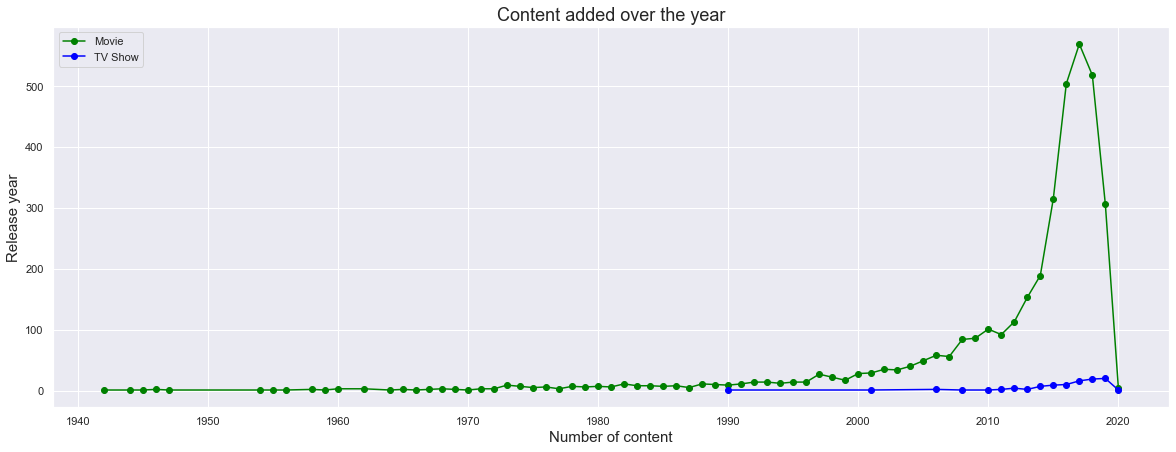

In [86]:
#growth in content over years
plt.figure(figsize=(20, 7))
#Convert groupby into Dataframe
group = pd.DataFrame({'count' : df.groupby( [ "Type", "Release year"] ).size()}).reset_index()
#Calcute percent
group['percent'] = group['count'].apply(lambda x: (x*100)/sum(group['count']))

#plot for movie
plt.plot(group[group['Type']=='Movie']['Release year'],group[group['Type']=='Movie']['count'],linestyle='-', marker='o', color='green', label="Movie")

#plot for TV Show
plt.plot(group[group['Type']=='TV Show']['Release year'],group[group['Type']=='TV Show']['count'], linestyle='-', marker='o',color='blue', label = "TV Show")
plt.title('Content added over the year', size=18)
plt.legend()
plt.xlabel('Number of content', size=15)
plt.ylabel('Release year', size=15)
plt.show()

When excluding the shows in 2020, we could see that Netflix increases both movies and TV shows each year. Year 2016 is the year when Netflix started to significantly invest in launching new shows on its platform and such efforts were more substaintial in year 2017.


### 4.2 Checking most common TV-rating content available on Netflix

Ratings that we have in the dataset is the TV parental guidelines are a television content rating system in the United States.

We will sort our ratings, because in the dataset there are a lot of types of ratings, and it is not efficient to show all of them on the pie chart

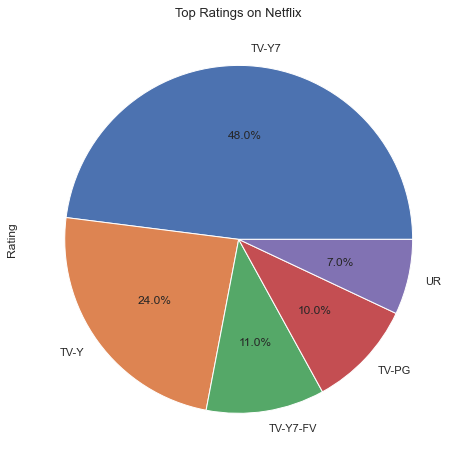

In [87]:
top_ratings = df.sort_values('Rating',ascending=False).head(100)
top_ratings['Rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,figsize=(8,8))
plt.title('Top Ratings on Netflix', size=13)
plt.show()

As we can see from the pie chart, most of the ratings are TV-MA and TV-14. TV-MA program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17. Programs rated TV-14 contains material that parents or adult guardians may find unsuitable for children under the age of 14. 

#### Bar plot for the same analysis

In this analysis of ratings, the bar chart is more convenient to see the most unpopular rating

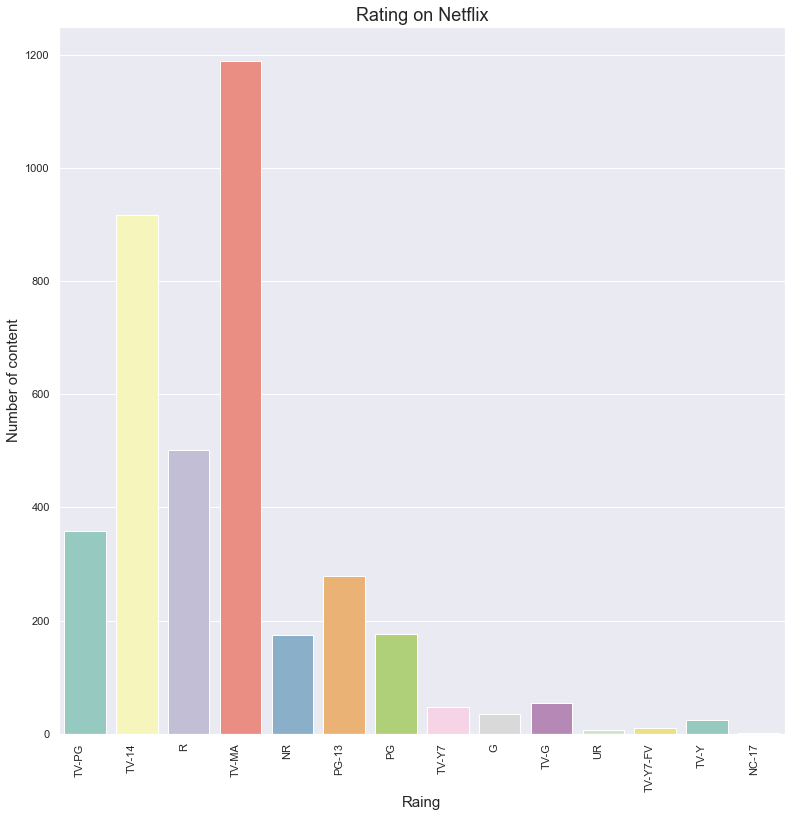

In [88]:
sns.countplot(df['Rating'], palette="Set3")
sns.countplot(df['Rating'], palette="Set3").set_xticklabels(sns.countplot(df['Rating'], palette="Set3").get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating on Netflix', size=18)
plt.ylabel('Number of content', size=15)
plt.xlabel('Raing', size=15)
plt.show()

The ratings are generally applied to most television series, television films and edited broadcast or basic cable versions of theatrically released films. The most popular is TV-MA, this program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17. Least popular TV-rating is UR this program is aimed at a very young audience, including children from ages 2–5.

#### Relation between Type and Rating

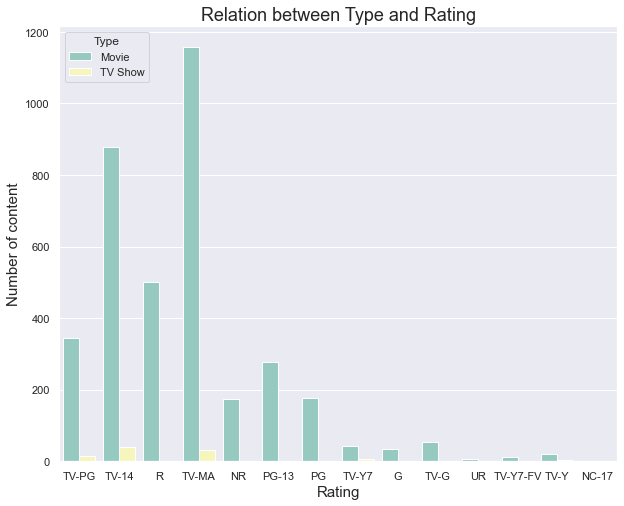

In [89]:
plt.figure(figsize=(10,8))
sns.countplot(x='Rating',hue='Type',data=df, palette="Set3")
plt.title('Relation between Type and Rating', size=18)
plt.xlabel('Rating', size=15)
plt.ylabel('Number of content', size=15)
plt.show()

The rating is still the same as in the previous question. For both movies and TV shows

### 4.3 How many movies vs. how many tv shows are on netflix

At this part we will look to the distribution of content on Netflix between Movies and TV shows.

Now we will compare number of movies and TV Shows

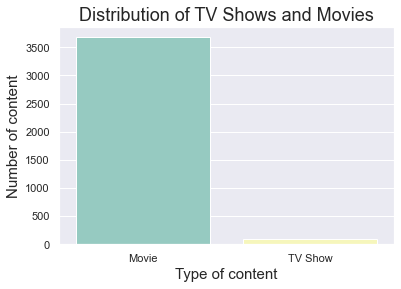

In [90]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Type", data=df, palette="Set3")
plt.title('Distribution of TV Shows and Movies', size=18)
plt.xlabel('Type of content', size=15)
plt.ylabel('Number of content', size=15)
plt.show()

Next, I will subset the Type column for this dataframe and count number of occurances of TV Show and Movie by using value_counts(). Once that is done I will plot the numbers in a Pie Chart using plot.pie

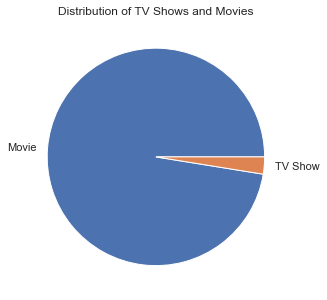

In [54]:
df_count  = df['Type'].value_counts()
df_count.plot.pie(y=df_count.index, figsize=(5, 5),title='Distribution of TV Shows and Movies');
plt.ylabel('')
plt.show()

Overall, there are more movies shown on Netflix than TV shows by title. But we should bear in mind that usually there are multiple seasons for a single TV shows, so the total amount of costs for Netflix to purchase them may be comparabl

### 4.4 Movie's durations and TV shows with the longest number of seasons

Now, we will analyze the movie's duration. Firstly, we will create variables for movies and shows. In the data frame, after the duration of movies comes 'min'. Then we will replace this word.

In [91]:
#variable for netflis_movies
netflix_movies=df[df['Type']=='Movie']

In [92]:
#variable for netflis_shows
netflix_shows=df[df['Type']=='TV Show']

In [ ]:
# We will replace 'min'
netflix_movies['Duration']=netflix_movies['Duration'].str.replace(' min','')
netflix_movies['Duration']=netflix_movies['Duration'].astype(str).astype(int)
netflix_movies['Duration']

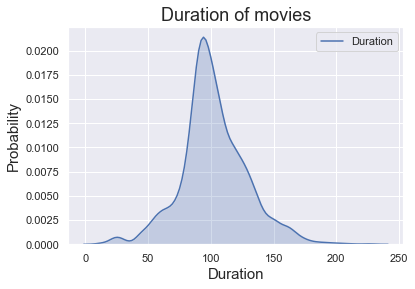

In [94]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['Duration'], shade=True)
plt.title('Duration of movies', size=18)
plt.xlabel('Duration', size=15)
plt.ylabel('Probability', size=15)
plt.show()

Analysis on movie duration, looks like most moves So, a good amount of movies on Netflix are among the duration of 75-120 mins. 
It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.

#### TV shows with the longest number of seasons

In the data frame, after the seasons number of TV shows comes 'Seasons'. Then we will replace this word.

In [ ]:
features=['Title','Duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['Duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

Then we will have durations with number of seasons

In [ ]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [97]:
#sorting the values
t=['Title','no_of_seasons']
top=durations[t]
top=top.sort_values(by='no_of_seasons', ascending=False)

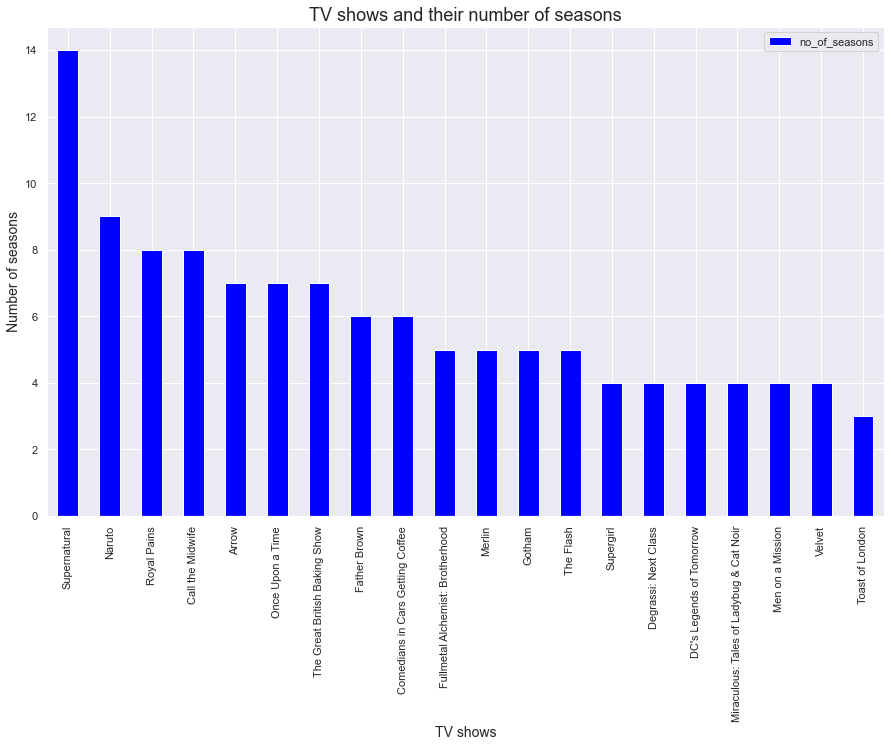

In [98]:
top20=top[0:20] #represent first 20 TV shows
top20.plot(kind='bar',x='Title',y='no_of_seasons', color='blue', figsize=(15,9) )
plt.title("TV shows and their number of seasons", fontsize=18)
plt.xlabel("TV shows", fontsize=14)
plt.ylabel("Number of seasons",fontsize=14)
plt.show()

The maximum number of seasons is 14, the TV show is Supernatural. The year 2020 will mark the end of the longest-running sci-fi series in television history. Supernatural, which premiered in 2005, has lasted for 14 seasons on the TV network. I believe it is because the show uses the “less is more” concepts in most of the seasons. The show, even though it’s called Supernatural, doesn’t focus on just that. The show focuses on common themes like family, brotherhood, abandonment, exile, and so much more; the supernatural aspects of the show are merely the cherries on top. I’m sure the fact that every episode is NOT over saturated with CGI and special effects creates a business where all cast and crew can be paid what they deserve. The 20th place is taken by the Toast of London TV show, with the number of seasons equal to two.

### 4.5 Number of movies and TV shows per category 

Converting into a single category in 'Listed in' column

In [62]:
c=0
l=[]
for i in df['Listed in']:
    k=str(i).split(',')
    l.append(k[0])
x = pd.Series(l) 
df['Listed in']=x
df.head(5)

,ID,Type,Title,Director,Cast,Countries,Date_added,Release year,Rating,Duration,Listed in,Description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","[United States, India, South Korea, China]","September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",[United States],"September 8, 2017",2017,TV-14,99 min,Action & Adventure,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","[Bulgaria, United States, Spain, Canada]","September 8, 2017",2014,R,110 min,Cult Movies,"In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,[Chile],"September 8, 2017",2017,TV-MA,60 min,Comedies,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","[United States, United Kingdom, Denmark, Sw...","September 8, 2017",2014,R,90 min,Horror Movies,A struggling couple can't believe their luck w...


Here I created a new dataset that will only include the TV shows

In [63]:
dfm=df[df['Type']=='Movie']

#### Number of movies per category

Here is presented the bar chart of category distribution in movies

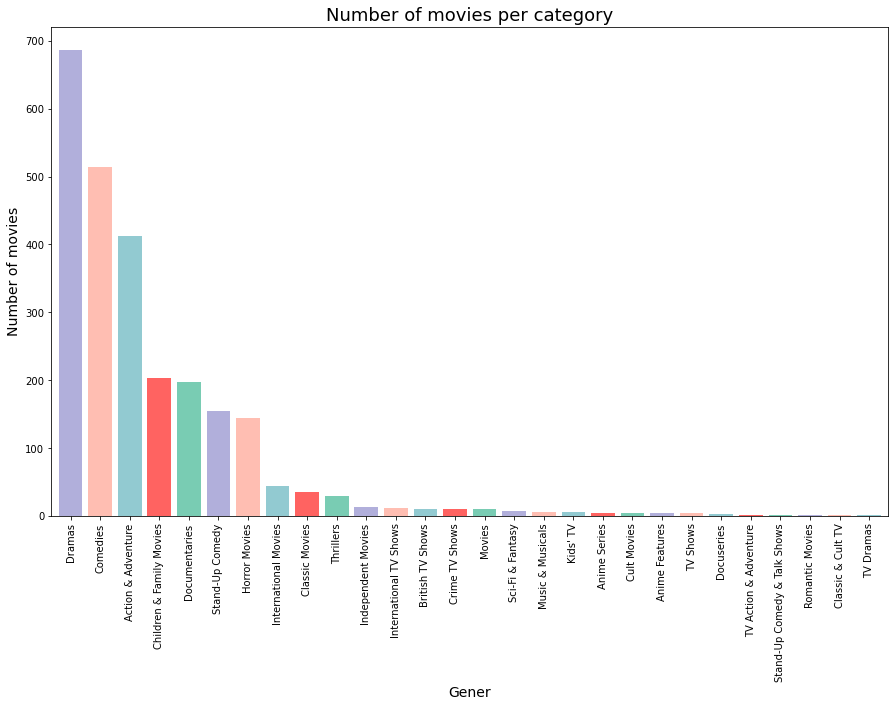

In [24]:
dfm['Listed in'].value_counts().plot(
    kind='bar',color=['#b1afdb','#ffbeb2','#92cad1','#ff6361','#79ccb3'],
    figsize=(15,9),width=0.8)
plt.title("Number of movies per category", fontsize=18)
plt.xlabel("Gener", fontsize=14)
plt.ylabel("Number of movies",fontsize=14)
plt.show()

As we can see, the most popular geners of films are dramas and comedies on the second place. Drama Films are serious presentations or stories with settings or life situations that portray realistic characters in conflict with either themselves, others, or forces of nature. Dramatic films are probably the largest film genre because they include a broad spectrum of films.  Least popular genre is TV Dramas. Mostly Korean dramas belong to this genre, but there are very few of them on Netflix, which is why this genre takes the last place.

#### Number of TV shows per category

Here I created a new dataset that will only include the TV shows

In [754]:
dftv=df[df['Type']=='TV Show']
dftv.head(5)

,ID,Type,Title,Director,Cast,Countries,Date_added,Release year,Rating,Duration,Listed in,Description
161,81000389,TV Show,The Hockey Girls,"Kiko Cruz Claverol, Patricia Font","Iria del Río, Nora Navas, Josep Linuesa, Natàl...",[Spain],"September 20, 2019",2019,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",The passionate members of a girls' roller hock...
247,80202129,TV Show,The Five,Mark Tonderai,"Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...",[United Kingdom],"September 15, 2017",2016,TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas",Twenty years after 5-year-old Jesse disappears...
333,81004113,TV Show,Age of Rebellion,Peter Ho,"Peter Ho, Jeanine Yang, Tammy Chen, Jason Tsou...",[Taiwan],"September 1, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","At their high school, a group of unruly teens ..."
466,80203920,TV Show,Nowhere Man,DJ Chen,"Alyssa Chia, Mavis Fan, Joseph Chang, Wang Po-...",[Taiwan],"October 31, 2019",2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Two nefarious schemes taking place 10 years ap...
474,81166978,TV Show,"Bring It On, Ghost",Park Joon-hwa,"Taecyeon, Kim So-hyun, Kwon Yul, Kim Sang-ho, ...",[South Korea],"October 30, 2019",2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A college student with psychic abilities takes...


Here is presented the bar chart of category distribution in TV shows

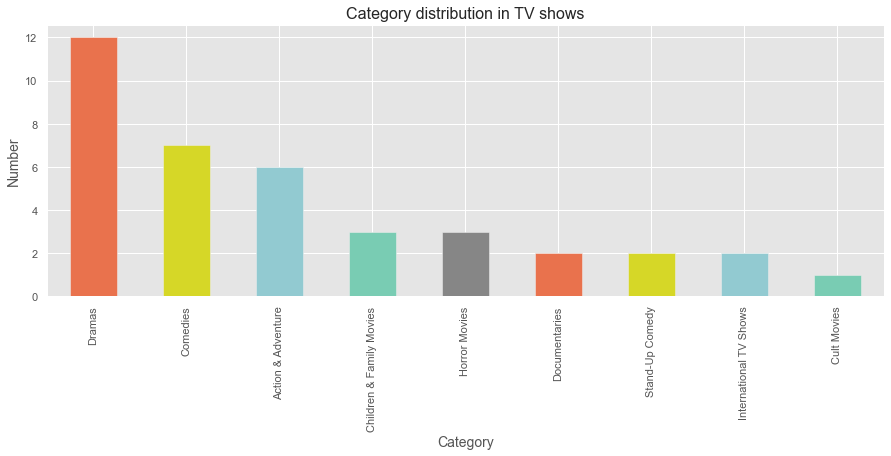

In [690]:
dftv['Listed in'].value_counts().plot(
    kind='bar',figsize=(15,5)
    ,color=['#e9724d','#d6d727','#92cad1','#79ccb3','#868686'])
plt.title("Category distribution in TV shows",fontsize=16)
plt.xlabel("Category",fontsize=14)
plt.ylabel("Number",fontsize=14)
plt.show()


As we can see, the most popular geners of TV shows is drama. Drama delivers the emotional and relational development of realistic characters in a realistic setting. It offers intense character development and tells an honest story of human struggle. Maybe that's why drama films are so popular. Least popular genre is cult movies, cult films are known for their dedicated, passionate fanbase which forms an elaborate subculture that engages in repeated viewings, quoting dialogue, and audience participation. But on the graph, we can see that cult movie are not popular among people

### 4.6 Length of content per category

Converting duration into int

In [25]:
m=df['Duration']
l=[]
for i in m:
    l.append(int(i.split(' ')[0]))
x = pd.Series(l) 
df['Duration']=x


Plot the graph for the length of movies per category

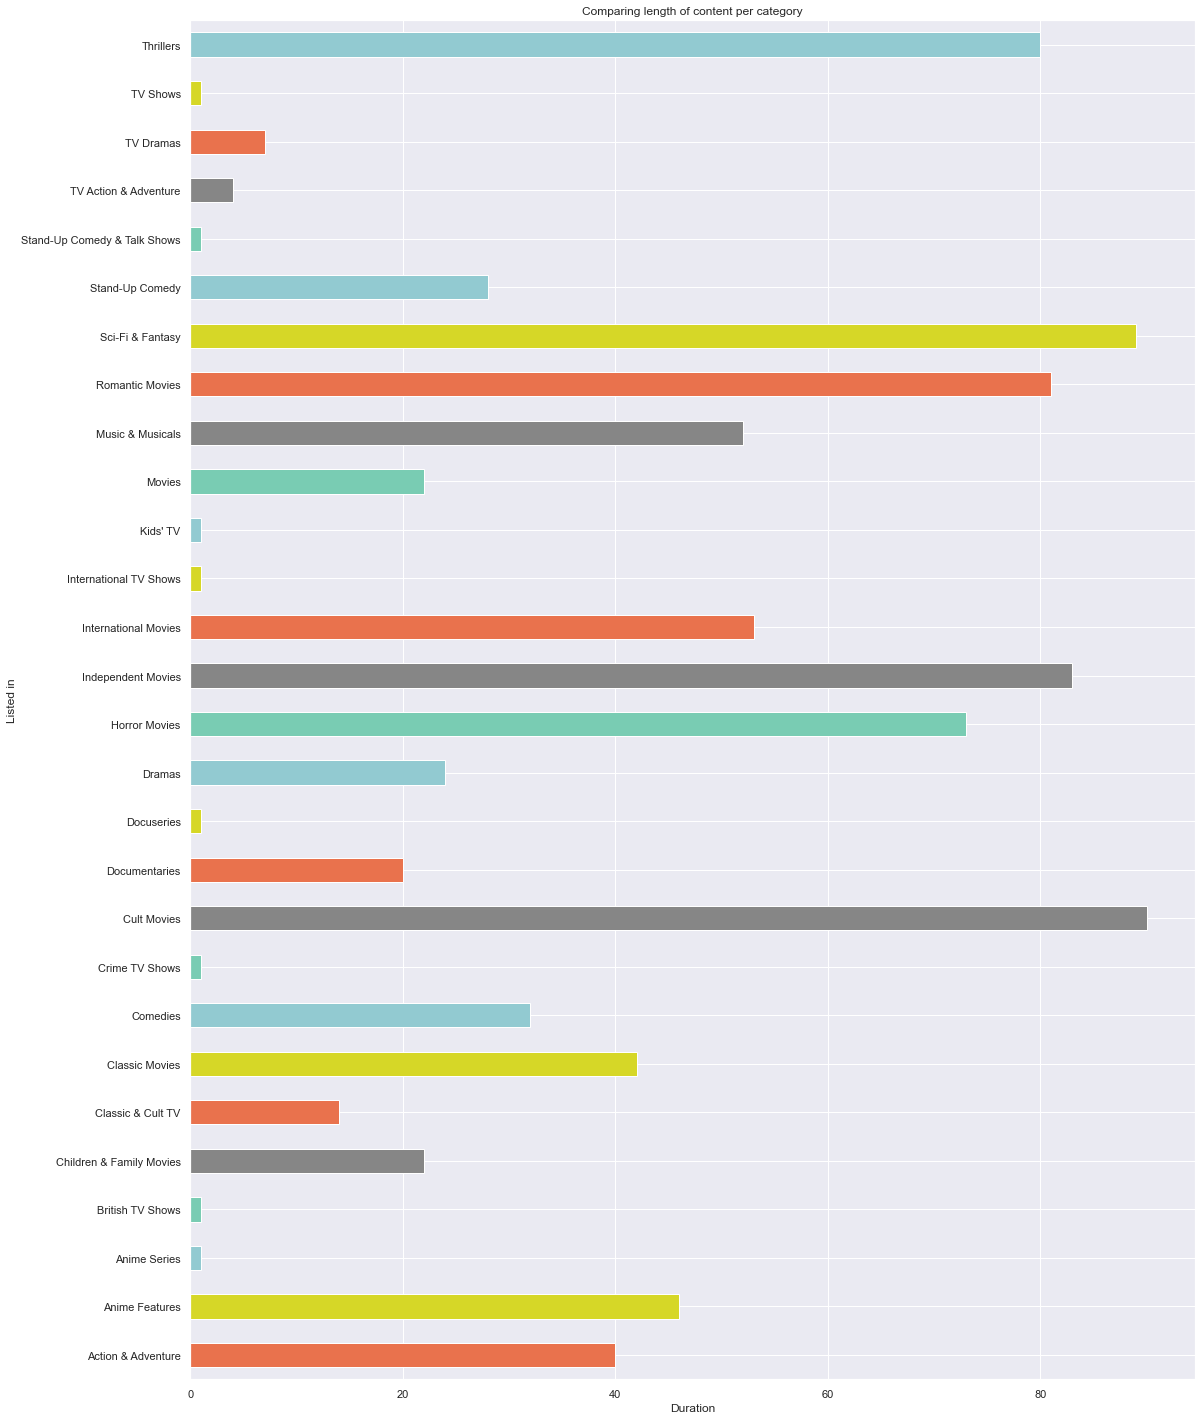

In [787]:
df.groupby('Listed in')['Duration'].min().plot(kind='barh',figsize=(18,25),
                                              color=['#e9724d','#d6d727','#92cad1','#79ccb3','#868686'])
plt.title("Comparing length of content per category")
plt.xlabel("Duration")
plt.show()

The longest genre is cult films, their average duration is one and a half hours. Basically, all shows do not last long, since they have many episodes, for example, shows such as stand-ups or children's programs are relatively small

### 4.7 Movie to TV Show Ratio

We all know that TV shows are more popular than ever after the boom of streaming services. Netflix has been adding a lot of original content for TV shows and Movies both. We can take a look at the ratio of TV shows vs Movies released in the last 20 years.
First we take unique combinations of Release Year and Type.

In [65]:
df = df.groupby(['Release year','Type']).Title.agg(['count']).rename(columns={'count':'num_of_show'}).reset_index()

Then, I will find the ration between movie and TV Show by dividing the number of movies by the number of TV shows

In [66]:
# calculate the ratio between movie and TV show each year
df_movie = df[df.Type=='Movie'].rename(columns={'num_of_show':'num_of_movie'})
df_TV = df[df.Type=='TV Show'].rename(columns={'num_of_show':'num_of_tv_show'})
df_new = df_movie.merge(df_TV, on='Release year',how='inner')
df_new['movie_tv_ratio']  =df_new.num_of_movie / df_new.num_of_tv_show


Netflix has gradually invested more in movies since 2006 when the number of shows significantly increased. But after 2016 the number of movies and shows are decreased

Text(0.5, 0, 'Year')

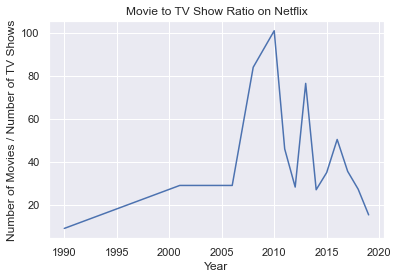

In [435]:
ax = sns.lineplot(x="Release year", y="movie_tv_ratio", data=df_new[:-1])
plt.title("Movie to TV Show Ratio on Netflix")
plt.ylabel("Number of Movies / Number of TV Shows")
plt.xlabel("Year")

Like expected, we can see here that after 2006 the number of MOvies and TV shows being released has been steadily increasing, whereas the the content offerings have been falling after 2017.

### 4.8 Summurizing main information

In this part you can see the summarized information on this dataset number of movies and TV Shows. A short description of these graphs, you can read in the part of the conclusion. In sections as:
+ How many movies vs. how many tv shows are on netflix
+ Checking most common TV-rating content available on Netflix
+ Content added over the year
+ Movie to TV Show Ratio on Netflix

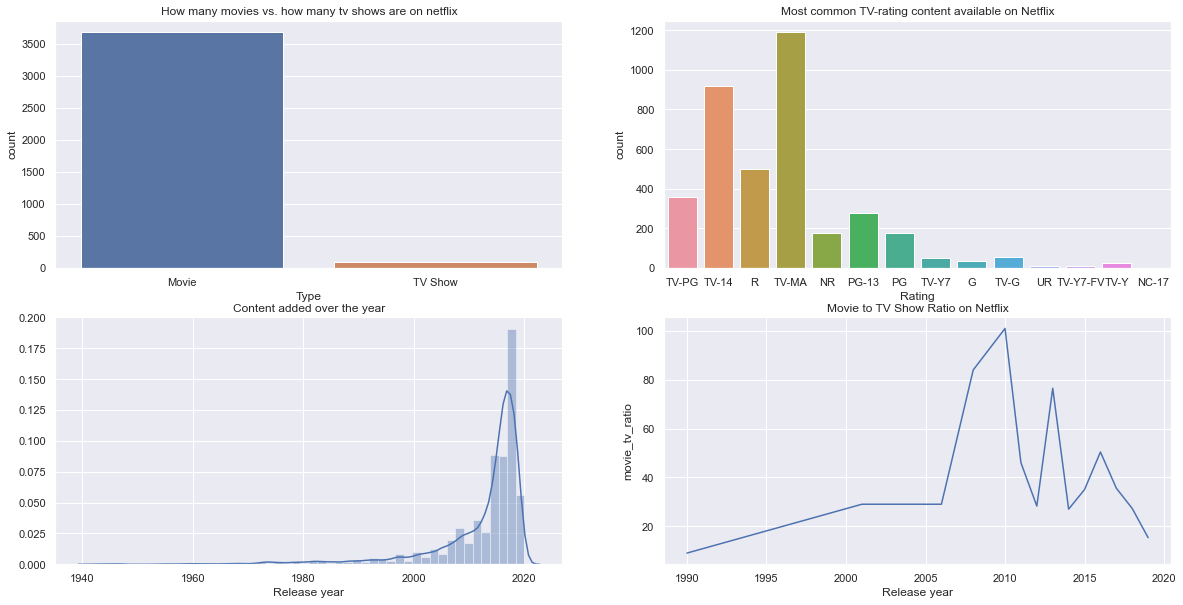

In [102]:
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot('Type',data=df,ax=axes[0,0]).set_title("How many movies vs. how many tv shows are on netflix")
sns.countplot('Rating',data=df,ax=axes[0,1]).set_title("Most common TV-rating content available on Netflix")
sns.distplot(df['Release year'], kde=True,ax=axes[1,0]).set_title("Content added over the year")
sns.lineplot(x="Release year", y="movie_tv_ratio", data=df_new[:-1], ax=axes[1,1]).set_title("Movie to TV Show Ratio on Netflix")
plt.show()

### Conclusion

There is a lot exploration possible with this dataset and even more, so if we can merge it with external data sets. Integrating this dataset with other datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
Some of the interesting questions (tasks) which can be performed on this dataset:
+ Content added over the year.
    Netflix increases both movies and TV shows each year. Year 2016 is the year when Netflix started to significantly invest in launching new shows on its platform and such efforts were more substaintial in year 2017.
+ Checking most common TV-rating content available on Netflix.
    The most popular is TV-MA. Least popular TV-rating is UR
+ Relation between Type and Rating.
   The rating is still the same as in the previous question. For both movies and TV shows
+ How many movies vs. how many tv shows are on netflix.
    Overall, there are more movies shown on Netflix than TV shows by title. But we should bear in mind that usually there are multiple seasons for a single TV shows, so the total amount of costs for Netflix to purchase them may be comparabl
+ Movie's and TV shows durations.
    Analysis on movie duration, looks like most moves So, a good amount of movies on Netflix are among the duration of 75-120 mins. 
It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.
The maximum number of seasons is 14, the TV show is Supernatural. The 20th place is taken by the Toast of London TV show, with the number of seasons equal to two.
+ Number of movies and TV shows per category.
    The most popular geners of films are drama and comedies. Least popular genre is romantic films
+ Length of movies per category.
    Basically, all shows do not last long, since they have many episodes, for example, shows such as stand-ups or children's programs are relatively small
+ Movie to TV Show Ratio. 
    After 2006 the number of Movies and TV shows being released has been steadily increasing, whereas the the content offerings have been falling after 2017.
